In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("coffee_survey.csv")

In [4]:
df.shape

(4042, 113)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Columns: 113 entries, Submission ID to Political Affiliation
dtypes: float64(21), object(92)
memory usage: 3.5+ MB


In [36]:
list(df.columns)

['Submission ID',
 'What is your age?',
 'How many cups of coffee do you typically drink per day?',
 'Where do you typically drink coffee?',
 'Where do you typically drink coffee? (At home)',
 'Where do you typically drink coffee? (At the office)',
 'Where do you typically drink coffee? (On the go)',
 'Where do you typically drink coffee? (At a cafe)',
 'Where do you typically drink coffee? (None of these)',
 'How do you brew coffee at home?',
 'How do you brew coffee at home? (Pour over)',
 'How do you brew coffee at home? (French press)',
 'How do you brew coffee at home? (Espresso)',
 'How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee))',
 'How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso))',
 'How do you brew coffee at home? (Instant coffee)',
 'How do you brew coffee at home? (Bean-to-cup machine)',
 'How do you brew coffee at home? (Cold brew)',
 'How do you brew coffee at home? (Coffee extract (e.g. Cometeer))',
 'How do you brew

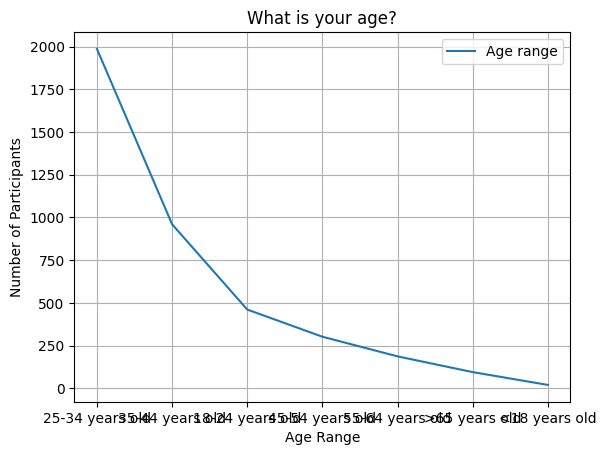

In [31]:
age = (df["What is your age?"].value_counts())
plt.plot(age, label="Age Range")

plt.xlabel("Age Range")
plt.ylabel("Number of Participants")
plt.title("What is your age?")

plt.legend()
plt.grid(True)

# plt.savefig("age.png")


In [41]:
df["What is your favorite coffee drink?"]

0       Regular drip coffee
1               Iced coffee
2       Regular drip coffee
3               Iced coffee
4                     Latte
               ...         
4037    Regular drip coffee
4038    Regular drip coffee
4039                  Latte
4040            Iced coffee
4041                  Latte
Name: What is your favorite coffee drink?, Length: 4042, dtype: object

In [54]:
df["What is your favorite coffee drink?"].unique()

array(['Regular drip coffee', 'Iced coffee', 'Latte', 'Pourover', nan,
       'Other', 'Cortado', 'Cappuccino', 'Espresso', 'Cold brew',
       'Americano', 'Mocha', 'Blended drink (e.g. Frappuccino)'],
      dtype=object)

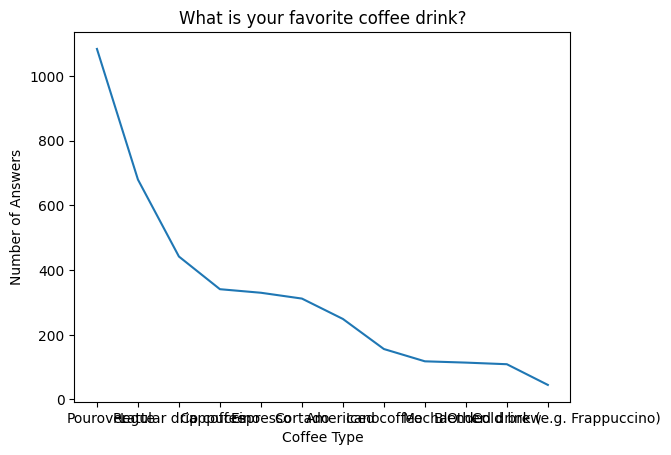

In [8]:
plt.xlabel("Coffee Type")
plt.ylabel("Number of Answers")
plt.title("What is your favorite coffee drink?")

coffee_pref = (df["What is your favorite coffee drink?"].value_counts())
plt.plot(coffee_pref)

In [53]:
age_ranges = (df["What is your age?"].value_counts())
age_counts = []
for age in age_ranges:
    age_counts.append(age)
print(age_counts)



# age_x = (df["What is your age?"].value_counts())
# # drink_y =(df["What is your favorite coffee drink?"].value_counts())
# # plt.bar(age_x, drink_y, label="Age Range")
# plt.bar(age_x)
# 
# plt.xlabel("Age Range")
# plt.ylabel("Number of Participants")
# plt.title("What is your age?")
# 
# plt.legend()
# plt.grid(True)
# 
# # plt.savefig("age.png")

[1986, 960, 461, 302, 187, 95, 20]
